In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import os

In [2]:
# ----------------------
# 1. Load Data
# ----------------------
DEFAULT_DATA_DIR = r"C:\Users\manoe.MC_ASUS\Documents\IRON HACK BOOTCAMP\DAFT_Feb 2025\labs\Week 5\5.1 lab-eda-univariate"

def load_data(file_name):
    """Load a dataset from the default directory and return it as a DataFrame."""
    file_path = os.path.join(DEFAULT_DATA_DIR, file_name)
    return pd.read_csv(file_path)


In [3]:
df_amz_uk = load_data("amz_uk_price_prediction_dataset.csv")
df_amz_uk.head(10)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
5,6,B09B97WSLF,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
6,7,B09B9615X2,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
7,8,B01MTB55WH,Anker Soundcore 2 Portable Bluetooth Speaker w...,4.7,103673,39.99,False,0,Hi-Fi Speakers
8,9,B016MO90GW,"Bluetooth Speaker, Anker Soundcore Speaker Upg...",4.7,29909,29.99,False,0,Hi-Fi Speakers
9,10,B09ZQF5GZW,RIENOK Bluetooth Speaker Portable Wireless Blu...,4.5,16014,29.99,False,0,Hi-Fi Speakers


### Part 1: Understanding Product Categories

**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1. **Frequency Tables**:
    - Generate a frequency table for the product `category`.
    - Which are the top 5 most listed product categories?




In [4]:
df_amz_uk['category'].count()

2443651

In [5]:
most_frequent_category = df_amz_uk['category'].value_counts()
proportion_table = df_amz_uk['category'].value_counts(normalize=True)

print ("The most frequent category are:")
print (most_frequent_category.head())
print ("\nThe Proportion Table is:")
print (proportion_table.head())

The most frequent category are:
category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

The Proportion Table is:
category
Sports & Outdoors                         0.342219
Beauty                                    0.007903
Handmade Clothing, Shoes & Accessories    0.007869
Bath & Body                               0.007813
Birthday Gifts                            0.007766
Name: proportion, dtype: float64


In [6]:
df_categories = pd.DataFrame({
    'count' : most_frequent_category,
    'proportion' : proportion_table
})

df_categories.head(10)



,count,proportion
category,,
Sports & Outdoors,836265,0.342219
Beauty,19312,0.007903
"Handmade Clothing, Shoes & Accessories",19229,0.007869
Bath & Body,19092,0.007813
Birthday Gifts,18978,0.007766
Manicure & Pedicure Products,18940,0.007751
Skin Care,18769,0.007681
Make-up,18756,0.007675
Hair Care,18735,0.007667


2. **Visualizations**:
    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*
    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

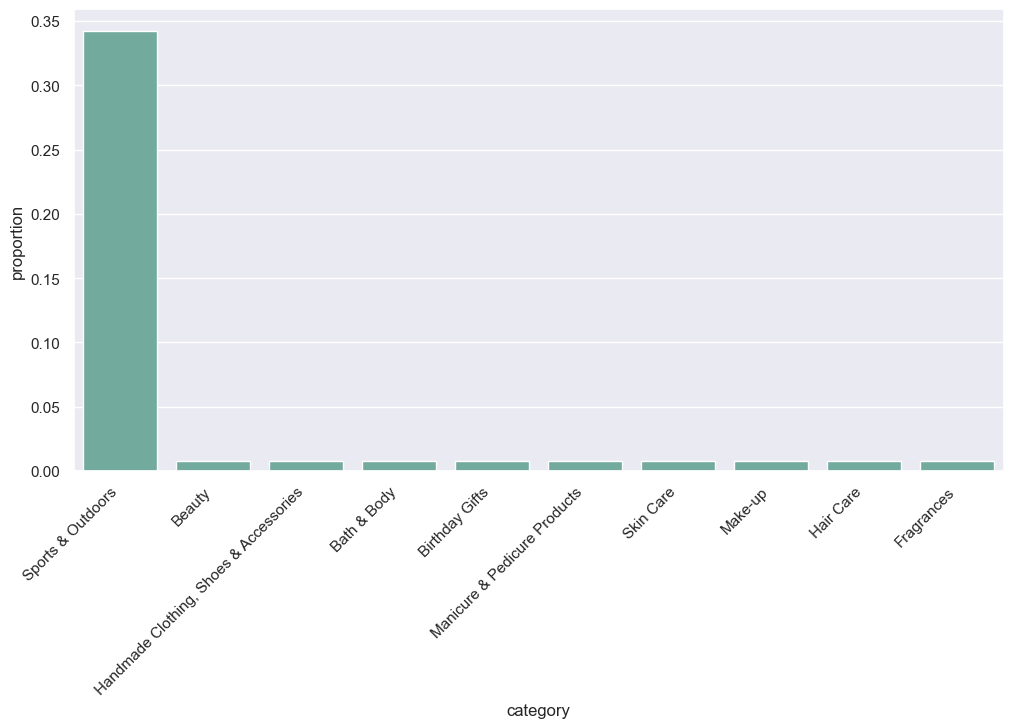

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


top_n = 10 
df_top_categories = df_amz_uk['category'].value_counts(normalize=True).head(top_n).reset_index()
df_top_categories.columns = ['category', 'proportion']

# Set plot style
sns.set_theme(style="darkgrid")

# Set figure size
plt.figure(figsize=(12, 6))

# Plot bar chart for the top N categories
sns.barplot(
    x="category", 
    y="proportion", 
    data=df_top_categories,  
    color='#69b3a2'
)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


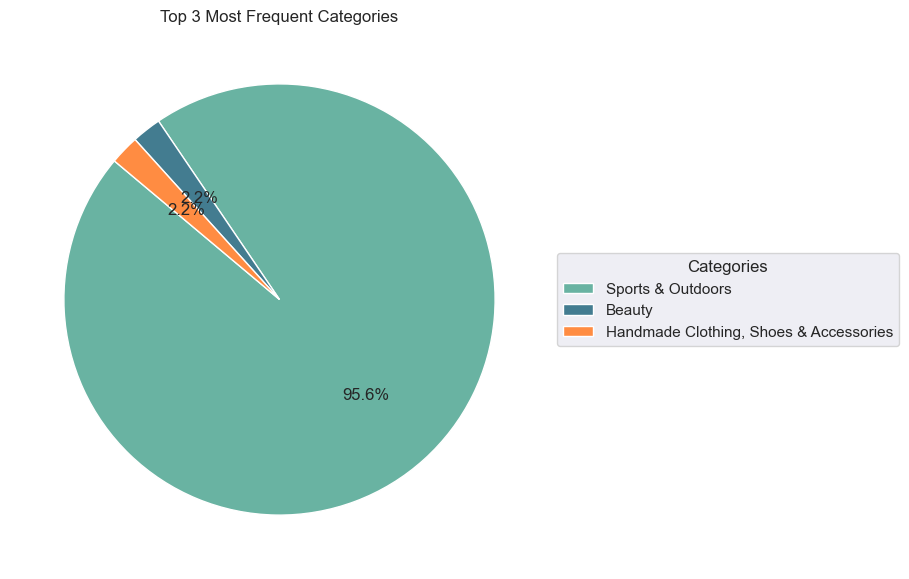

In [8]:
import matplotlib.pyplot as plt

# Get the top 3 categories
top_n = 3
df_top_categories = df_amz_uk['category'].value_counts(normalize=True).head(top_n).reset_index()
df_top_categories.columns = ['category', 'proportion']

# Define colors
colors = ['#69b3a2', '#437c90', '#ff8c42']

# Create a pie chart
plt.figure(figsize=(7, 7))  # Adjust figure size
wedges, texts, autotexts = plt.pie(
    df_top_categories['proportion'],  
    labels=None,  # Remove direct labels for cleaner chart
    autopct='%1.1f%%',  
    colors=colors,  
    startangle=140,  
    wedgeprops={'edgecolor': 'white'}
)

# Add a legend on the right side
plt.legend(
    wedges, df_top_categories['category'], 
    title="Categories", loc="center left", 
    bbox_to_anchor=(1, 0.5)  # Moves the legend outside the chart
)

# Add title
plt.title("Top 3 Most Frequent Categories")

# Show plot
plt.show()


### Part 2: Delving into Product Pricing 

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?

3. **Visualizations**:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 

In [9]:
average_price = df_amz_uk['price'].mean()

median_price = df_amz_uk['price'].median()

mode_price = df_amz_uk['price'].mode()

print (f"the average price is:", average_price, f"\nthe median price is:", median_price, f"\nthe mode price is:", mode_price)

the average price is: 89.24380943923663 
the median price is: 19.09 
the mode price is: 0    9.99
Name: price, dtype: float64


In [10]:
import pandas as pd
import numpy as np
from scipy.stats import skew
skewness_value = skew(df_amz_uk['price'])
print ("Skewness value is:", skewness_value)

Skewness value is: 27.492960690108827


ANSWER: 1. What's the average price point of products listed? How does this compare with the most common price point (mode)?'

The average price point (mean) is significantly higher than the most common price point (mode), indicating that a few high-priced products are pulling the average up.
The mode is only 11% of the mean, meaning the typical price customers see is much lower than the average price.
The skewness value is 27.49, confirming an extremely right-skewed distribution. This suggests that most products are priced on the lower end, while a few high-priced products distort the mean.

Business Implication:

If the goal is to attract more buyers, pricing strategies should focus around the mode, as it represents the most frequently occurring price point.



2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?

In [11]:
variance = df_amz_uk['price'].var()
std = df_amz_uk['price'].std()

max_price = df_amz_uk['price'].max()
min_price = df_amz_uk['price'].min()
price_range = max_price - min_price

iqr = df_amz_uk['price'].quantile(0.75) - df_amz_uk['price'].quantile(0.25)
print ("variance:", variance, "\nstandard deviation:", std, "\nprice_range:", price_range, "\nIQR:", iqr)


variance: 119445.48532256528 
standard deviation: 345.60886175352226 
price_range: 100000.0 
IQR: 36.0


In [12]:
df_amz_uk['price'].describe()


count    2.443651e+06
mean     8.924381e+01
std      3.456089e+02
min      0.000000e+00
25%      9.990000e+00
50%      1.909000e+01
75%      4.599000e+01
max      1.000000e+05
Name: price, dtype: float64

ANSWER 2: 

IQR = 36.0 vs. Std = 345.6
The middle 50% of product prices (Q1 to Q3) are within a tight range (just 36).

But the standard deviation is almost 10x larger, meaning prices are spread way beyond that core.

This gap suggests many values lie far from the center > likely extreme outliers.

Price Range = 100,000
Gigantic difference between cheapest and most expensive product.
The boxplot will probably have tiny box, long whiskers, and lots of outlier dots far from the box.

Variance = 119,445
Reinforces the overall volatility in your price data.
Since variance is in squared units, it’s harder to interpret intuitively than standard deviation — but large numbers = high spread.

### 3. **Visualizations**:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.m
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.   M

In [13]:
# create bin

bins = list(range(0, int(max_price) + 100, 100))

df_amz_uk['price_range'] = pd.cut(df_amz_uk['price'], bins= bins)

price_distribution = df_amz_uk['price_range'].value_counts().sort_index()

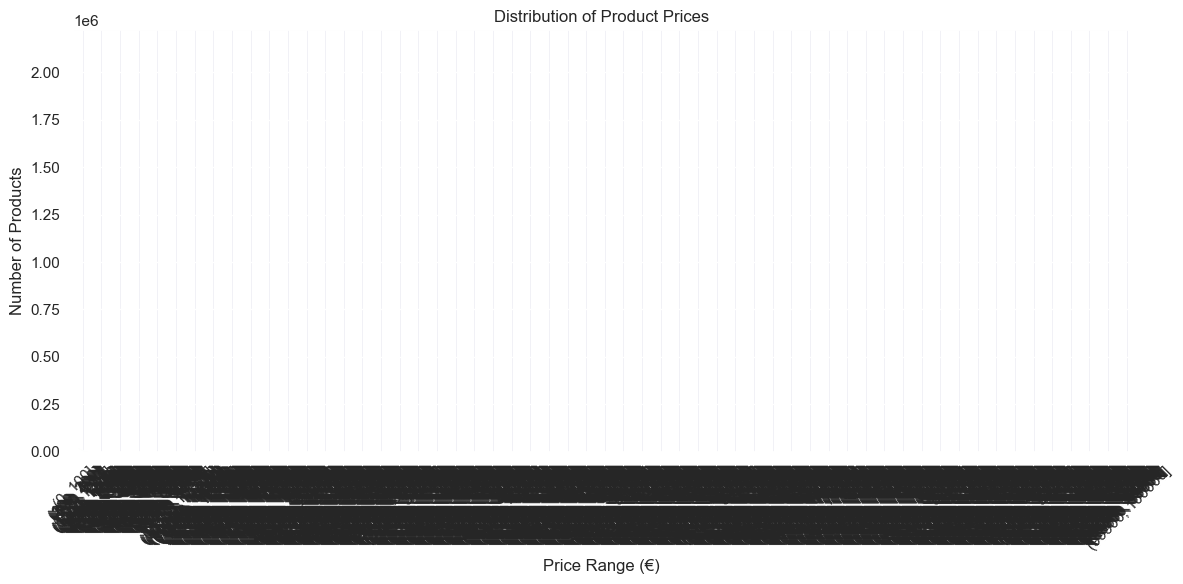

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
price_distribution.plot(kind='bar', color='#69b3a2')
plt.xlabel("Price Range (€)")
plt.ylabel("Number of Products")
plt.title("Distribution of Product Prices")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


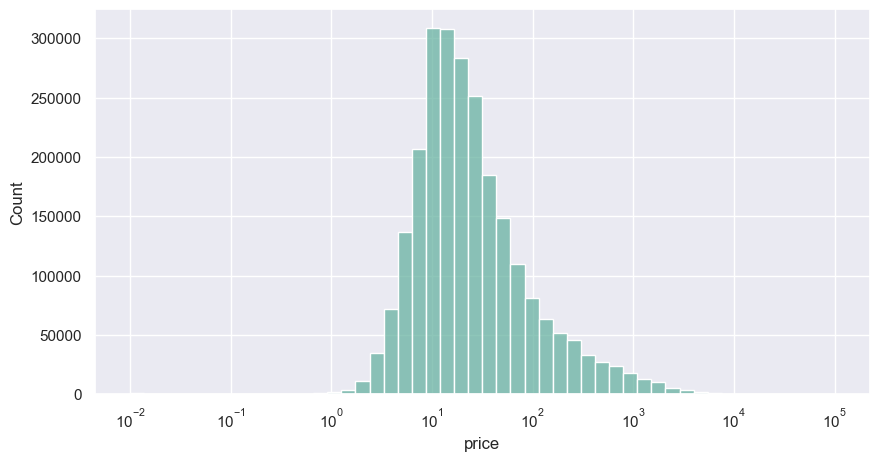

In [15]:
plt.figure(figsize=(10, 5))
ax = sns.histplot(df_amz_uk['price'], bins=50, log_scale=(True, False), color='#69b3a2')


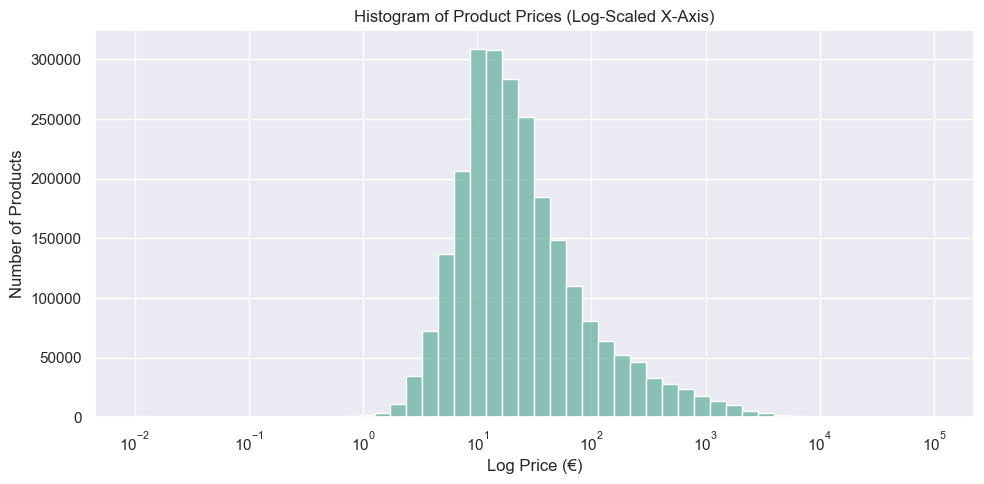

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


plt.figure(figsize=(10, 5))
sns.histplot(df_amz_uk['price'], bins=50, log_scale=(True, False), color='#69b3a2')


# Apply European banking-style formatting
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:_.0f}'.replace('_', '.')))

plt.title('Histogram of Product Prices (Log-Scaled X-Axis)')
plt.xlabel('Log Price (€)')
plt.ylabel('Number of Products')
plt.tight_layout()
plt.show()
